In [1]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import folium
from folium.plugins import HeatMap, HeatMapWithTime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Cargamos los datos y addicionalmente la lista de codigos de cada pais.

In [5]:
data_df = pd.read_csv(os.path.join("une_rt_m.tsv"), sep='\t')

In [6]:
country_codes_df = pd.read_csv(os.path.join("wikipedia-iso-country-codes.csv"))

In [7]:
#Comprobamos los valores datos

In [8]:
data_df.shape

(2131, 452)

In [9]:
data_df.head()

s_adj,age,unit,sex,geo\time 2020M07  2020M06  2020M05  2020M04  2020M03   \
0       NSA,TOTAL,PC_ACT,F,AT     6.0      6.2      5.2      4.9      4.7    
1       NSA,TOTAL,PC_ACT,F,BE     5.4      5.0      5.0      5.2      5.0    
2       NSA,TOTAL,PC_ACT,F,BG     3.9      3.9      4.2      4.7      4.1    
3       NSA,TOTAL,PC_ACT,F,CH       :      4.4      4.3      4.4      4.6    
4       NSA,TOTAL,PC_ACT,F,CY     7.2      6.6      6.4      6.8      7.1    

  2020M02  2020M01  2019M12  2019M11   ... 1983M10  1983M09  1983M08   \
0     4.1      4.4      4.0      3.9   ...       :        :        :    
1     4.9      4.8      4.6      4.5   ...       :        :        :    
2     4.2      4.3      3.9      3.8   ...       :        :        :    
3     4.6      4.5      4.1      4.0   ...       :        :        :    
4     7.5      7.9      7.5      7.7   ...       :        :        :    

  1983M07  1983M06  1983M05  1983M04  1983M03  1983M02  1983M01   
0       :        :        :        :        :        :        :   
1       :        :        :        :        :        :        :   
2       :        :        :        :        :        :        :   
3       :        :        :        :        :        :        :   
4       :        :        :        :        :        :        :   

[5 rows x 452 columns]

In [10]:
#Cambiamos los nombres de las columnas y comprobamos

In [11]:
country_codes_df.head()

English short name lower case Alpha-2 code Alpha-3 code  Numeric code  \
0                      Zimbabwe           ZW          ZWE           716   
1                        Zambia           ZM          ZMB           894   
2                         Yemen           YE          YEM           887   
3                Western Sahara           EH          ESH           732   
4             Wallis and Futuna           WF          WLF           876   

      ISO 3166-2  
0  ISO 3166-2:ZW  
1  ISO 3166-2:ZM  
2  ISO 3166-2:YE  
3  ISO 3166-2:EH  
4  ISO 3166-2:WF

In [12]:
country_codes_df.columns = ['country', 'C2', 'C3', 'numeric', 'iso']

In [13]:
country_codes_df.head()

country  C2   C3  numeric            iso
0           Zimbabwe  ZW  ZWE      716  ISO 3166-2:ZW
1             Zambia  ZM  ZMB      894  ISO 3166-2:ZM
2              Yemen  YE  YEM      887  ISO 3166-2:YE
3     Western Sahara  EH  ESH      732  ISO 3166-2:EH
4  Wallis and Futuna  WF  WLF      876  ISO 3166-2:WF

In [14]:
#Separamos de la primera columna los diferentes atributos y ponerlos en diferentes columnas

In [15]:
data_df['C2'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[-1])
data_df['age'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[1])
data_df['unit'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[2])
data_df['sex'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[3])
data_df['s_adj'] = data_df['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[0])

In [16]:
data_df.head()

s_adj,age,unit,sex,geo\time 2020M07  2020M06  2020M05  2020M04  2020M03   \
0       NSA,TOTAL,PC_ACT,F,AT     6.0      6.2      5.2      4.9      4.7    
1       NSA,TOTAL,PC_ACT,F,BE     5.4      5.0      5.0      5.2      5.0    
2       NSA,TOTAL,PC_ACT,F,BG     3.9      3.9      4.2      4.7      4.1    
3       NSA,TOTAL,PC_ACT,F,CH       :      4.4      4.3      4.4      4.6    
4       NSA,TOTAL,PC_ACT,F,CY     7.2      6.6      6.4      6.8      7.1    

  2020M02  2020M01  2019M12  2019M11   ... 1983M05  1983M04  1983M03   \
0     4.1      4.4      4.0      3.9   ...       :        :        :    
1     4.9      4.8      4.6      4.5   ...       :        :        :    
2     4.2      4.3      3.9      3.8   ...       :        :        :    
3     4.6      4.5      4.1      4.0   ...       :        :        :    
4     7.5      7.9      7.5      7.7   ...       :        :        :    

  1983M02  1983M01   C2    age    unit sex s_adj  
0       :        :   AT  TOTAL  PC_ACT   F   NSA  
1       :        :   BE  TOTAL  PC_ACT   F   NSA  
2       :        :   BG  TOTAL  PC_ACT   F   NSA  
3       :        :   CH  TOTAL  PC_ACT   F   NSA  
4       :        :   CY  TOTAL  PC_ACT   F   NSA  

[5 rows x 457 columns]

In [17]:
#Comprobamos que la division se hay realizado correctamente revisando la lista de paises

In [18]:
print(f"countries:\n{list(data_df.C2.unique())}")

countries:
['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA', 'EA18', 'EA19', 'EE', 'EL', 'ES', 'EU25', 'EU27_2007', 'EU27_2020', 'EU28', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'JP', 'LT', 'LU', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK', 'UK', 'US', 'TR']


In [19]:
#Vamos a elegir el intervalo de tiempo entre 2010 y 2020

In [20]:
selected_cols = ['C2','age','unit','sex', 's_adj', 
                 '2020M07 ', '2020M06 ', '2020M05 ', '2020M04 ','2020M03 ','2020M02 ','2020M01 ',
                 
                 '2019M12 ','2019M11 ','2019M10 ','2019M09 ','2019M08 ','2019M07 ',
                 '2019M06 ','2019M05 ','2019M04 ','2019M03 ','2019M02 ','2019M01 ',
                
                 '2018M12 ','2018M11 ','2018M10 ','2018M09 ','2018M08 ','2018M07 ',
                 '2018M06 ','2018M05 ','2018M04 ','2018M03 ','2018M02 ','2018M01 ',
                
                 '2017M12 ','2017M11 ','2017M10 ','2017M09 ','2017M08 ','2017M07 ',
                 '2017M06 ','2017M05 ','2017M04 ','2017M03 ','2017M02 ','2017M01 ',
                
                 '2016M12 ','2016M11 ','2016M10 ','2016M09 ','2016M08 ','2016M07 ',
                 '2016M06 ','2016M05 ','2016M04 ','2016M03 ','2016M02 ','2016M01 ',
                
                 '2015M12 ','2015M11 ','2015M10 ','2015M09 ','2015M08 ','2015M07 ',
                 '2015M06 ','2015M05 ','2015M04 ','2015M03 ','2015M02 ','2015M01 ', 
                 
                '2014M12 ','2014M11 ','2014M10 ','2014M09 ','2014M08 ',
                '2014M07 ', '2014M06 ', '2014M05 ', '2014M04 ','2014M03 ','2014M02 ','2014M01 ',


                 '2013M12 ','2019M11 ','2019M10 ','2019M09 ','2019M08 ','2019M07 ',
                 '2013M06 ','2013M05 ','2013M04 ','2013M03 ','2013M02 ','2013M01 ',
                
                 '2012M12 ','2012M11 ','2012M10 ','2012M09 ','2012M08 ','2012M07 ',
                '2012M06 ','2012M05 ','2012M04 ','2012M03 ','2012M02 ','2012M01 ',
                
                 '2011M12 ','2011M11 ','2011M10 ','2011M09 ','2011M08 ','2011M07 ',
                 '2011M06 ','2011M05 ','2011M04 ','2011M03 ','2011M02 ','2011M01 ',
                
                 '2010M12 ','2010M11 ','2010M10 ','2010M09 ','2010M08 ','2010M07 ',
                 '2010M06 ','2010M05 ','2010M04 ','2010M03 ','2010M02 ','2010M01 ',]

In [21]:
data_sel_df = data_df[selected_cols]
data_sel_df.head()

C2    age    unit sex s_adj 2020M07  2020M06  2020M05  2020M04  2020M03   \
0  AT  TOTAL  PC_ACT   F   NSA     6.0      6.2      5.2      4.9      4.7    
1  BE  TOTAL  PC_ACT   F   NSA     5.4      5.0      5.0      5.2      5.0    
2  BG  TOTAL  PC_ACT   F   NSA     3.9      3.9      4.2      4.7      4.1    
3  CH  TOTAL  PC_ACT   F   NSA       :      4.4      4.3      4.4      4.6    
4  CY  TOTAL  PC_ACT   F   NSA     7.2      6.6      6.4      6.8      7.1    

   ... 2010M10  2010M09  2010M08  2010M07  2010M06  2010M05  2010M04   \
0  ...     5.1      4.7      4.6      4.7      4.5      4.5      5.0    
1  ...     8.4      8.8      9.2      9.0      8.1      8.0      8.3    
2  ...     9.9      9.2      8.9      8.9      9.1      9.5      9.8    
3  ...     4.8      5.5      5.8      5.6      5.1      5.0      5.2    
4  ...     4.9      5.0      5.9      6.6      7.1      6.5      6.7    

  2010M03  2010M02  2010M01   
0     4.5      4.9      4.5   
1     8.7      9.0      9.1   
2     9.6      9.6      9.3   
3     5.4      5.4      5.5   
4     7.6      7.3      7.2   

[5 rows x 132 columns]

In [22]:
#Vamos a unir las columnas de codigos

In [23]:
data_sel_df = data_sel_df.merge(country_codes_df, on="C2")
data_sel_df.head()

C2    age     unit sex s_adj 2020M07  2020M06  2020M05  2020M04  2020M03   \
0  AT  TOTAL   PC_ACT   F   NSA     6.0      6.2      5.2      4.9      4.7    
1  AT  TOTAL   PC_ACT   M   NSA     5.5      6.2      6.1      5.2      5.0    
2  AT  TOTAL   PC_ACT   T   NSA     5.7      6.2      5.7      5.1      4.9    
3  AT  TOTAL  THS_PER   F   NSA     129      132      108      100       97    
4  AT  TOTAL  THS_PER   M   NSA     134      149      144      121      118    

   ... 2010M06  2010M05  2010M04  2010M03  2010M02  2010M01   country   C3  \
0  ...     4.5      4.5      5.0      4.5      4.9      4.5   Austria  AUT   
1  ...     5.0      4.9      5.5      6.2      6.0      5.2   Austria  AUT   
2  ...     4.7      4.8      5.2      5.4      5.5      4.9   Austria  AUT   
3  ...      76       93      104       76      100       93   Austria  AUT   
4  ...      95      118      133      120      142      122   Austria  AUT   

  numeric            iso  
0      40  ISO 3166-2:AT  
1      40  ISO 3166-2:AT  
2      40  ISO 3166-2:AT  
3      40  ISO 3166-2:AT  
4      40  ISO 3166-2:AT  

[5 rows x 136 columns]

In [24]:
print(f"selected data shape: {data_sel_df.shape}")

selected data shape: (1645, 136)


In [25]:
#La parte más importante, vamos a usar merge para convertir todos los meses en columnas

In [26]:
data_tr_df = data_sel_df.melt(id_vars=["country", "age", "unit", "sex", "s_adj", "C2", "C3", "numeric", "iso"], 
        var_name="Date", 
        value_name="Value")

In [27]:
data_tr_df.head()

country    age     unit sex s_adj  C2   C3  numeric            iso  \
0  Austria  TOTAL   PC_ACT   F   NSA  AT  AUT       40  ISO 3166-2:AT   
1  Austria  TOTAL   PC_ACT   M   NSA  AT  AUT       40  ISO 3166-2:AT   
2  Austria  TOTAL   PC_ACT   T   NSA  AT  AUT       40  ISO 3166-2:AT   
3  Austria  TOTAL  THS_PER   F   NSA  AT  AUT       40  ISO 3166-2:AT   
4  Austria  TOTAL  THS_PER   M   NSA  AT  AUT       40  ISO 3166-2:AT   

       Date Value  
0  2020M07   6.0   
1  2020M07   5.5   
2  2020M07   5.7   
3  2020M07   129   
4  2020M07   134

In [28]:
#Ahora hay que limpiar la columna values de todo lo que no sean digitos

In [29]:
import re
data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: re.sub(r"[a-zA-Z: ]", "", x))
data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: x.replace(" ",""))

data_tr_df = data_tr_df.loc[~(data_tr_df.Value=="")]

data_tr_df['Value'] = data_tr_df['Value'].apply(lambda x: float(x))

In [30]:
#Veamos cuantos valores tenemos

In [31]:
print(f"distinct values: {len(list(data_tr_df['Value'].unique()))}")
print(f"samples values: {data_tr_df['Value'].unique()}")

distinct values: 5216
samples values: [6.0000e+00 5.5000e+00 5.7000e+00 ... 8.9410e+03 1.4987e+04 1.1059e+04]


In [32]:
#Realizamos un filtrado para seleccionar solo los datos que conciernen al porcentage de población activa (PC_ACT)
# y ambos sexos entre 35 y 74 años 

In [33]:
total_y25_74_df = data_tr_df.loc[(data_tr_df.age=='Y25-74')&(data_tr_df.unit=='PC_ACT')&(data_tr_df.sex=='T')&(data_tr_df.s_adj=='TC')]

In [34]:
#Definimos la funcion de gráfica 

In [35]:
def plot_time_variation(df, y='Value', size=1, is_log=False, title=""):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))

    countries = list(df.country.unique())
    for country in countries:
        df_ = df[(df['country']==country)] 
        g = sns.lineplot(x="Date", y=y, data=df_,  label=country)  
        ax.text(max(df_['Date']), (df_.loc[df_['Date']==max(df_['Date']), y]), str(country))
    plt.xticks(rotation=90)
    plt.title(f'Total desempleados, {title}, ordenados por pais')
    ax.text(max(df_['Date']), (df_.loc[df_['Date']==max(df_['Date']), y]), str(country))
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

In [36]:
#Mostramos las graficas

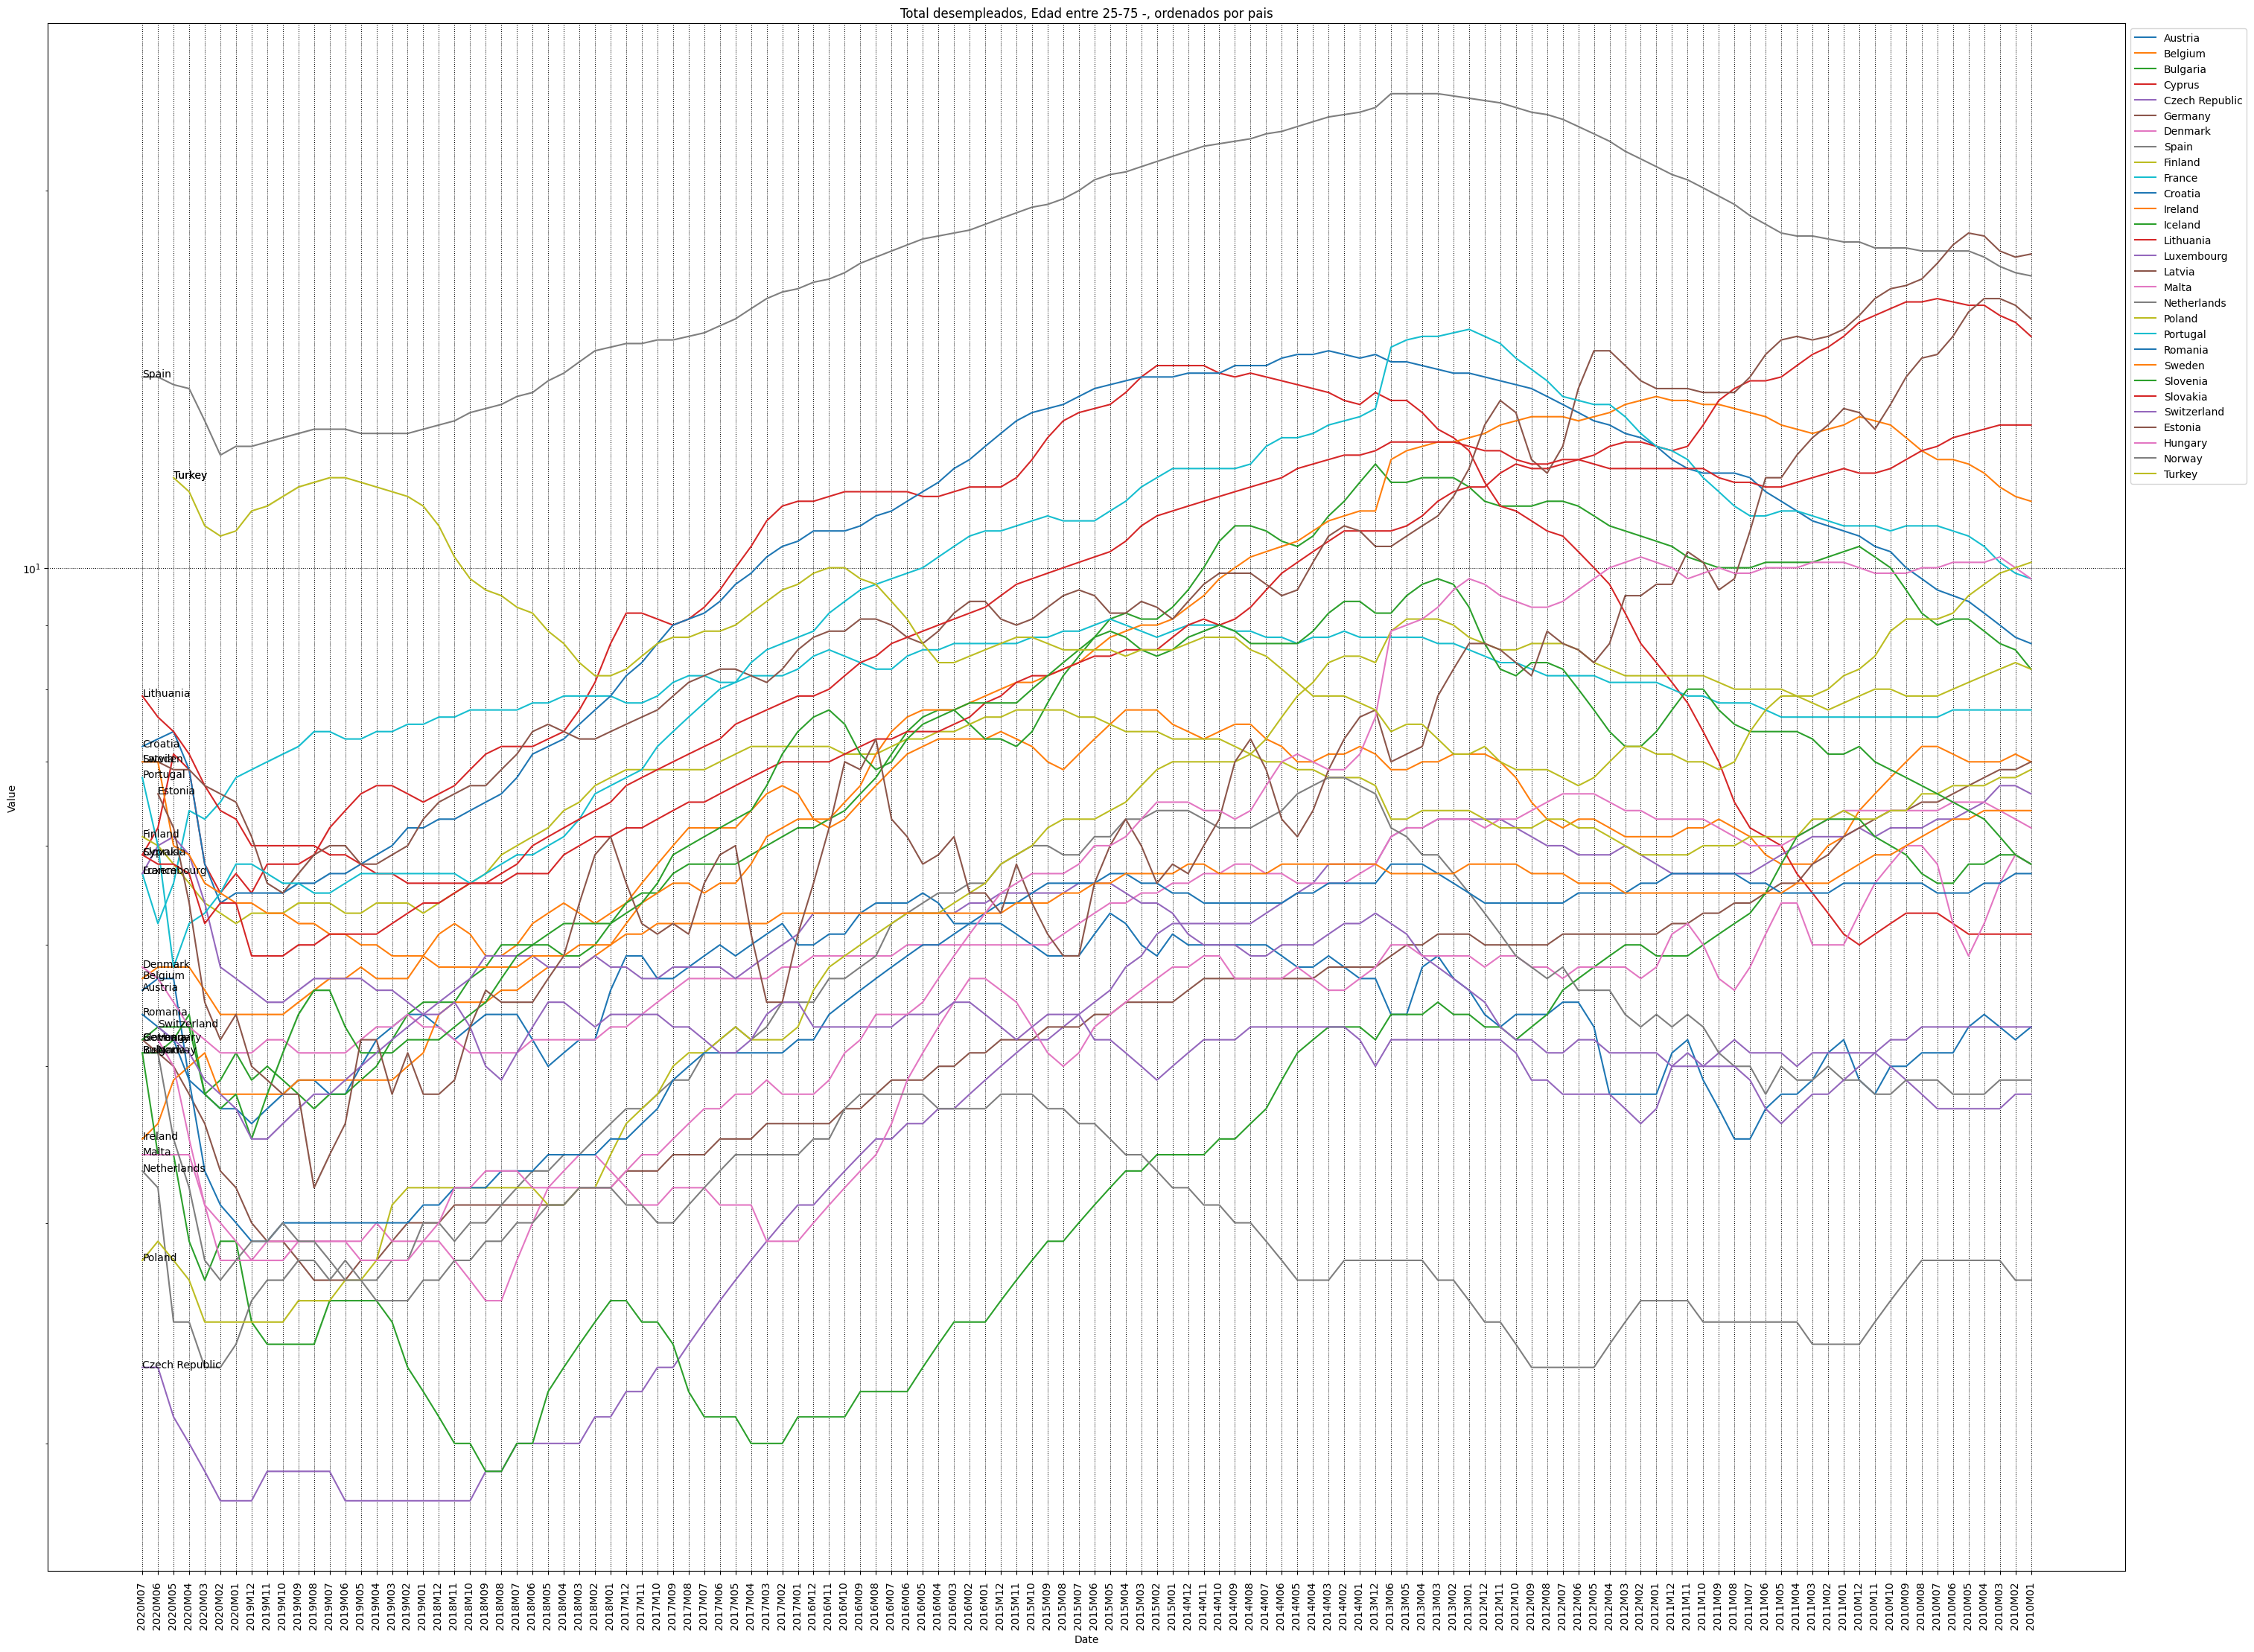

In [37]:
plot_time_variation(total_y25_74_df, size=9, is_log=True, title = "Edad entre 25-75 -")

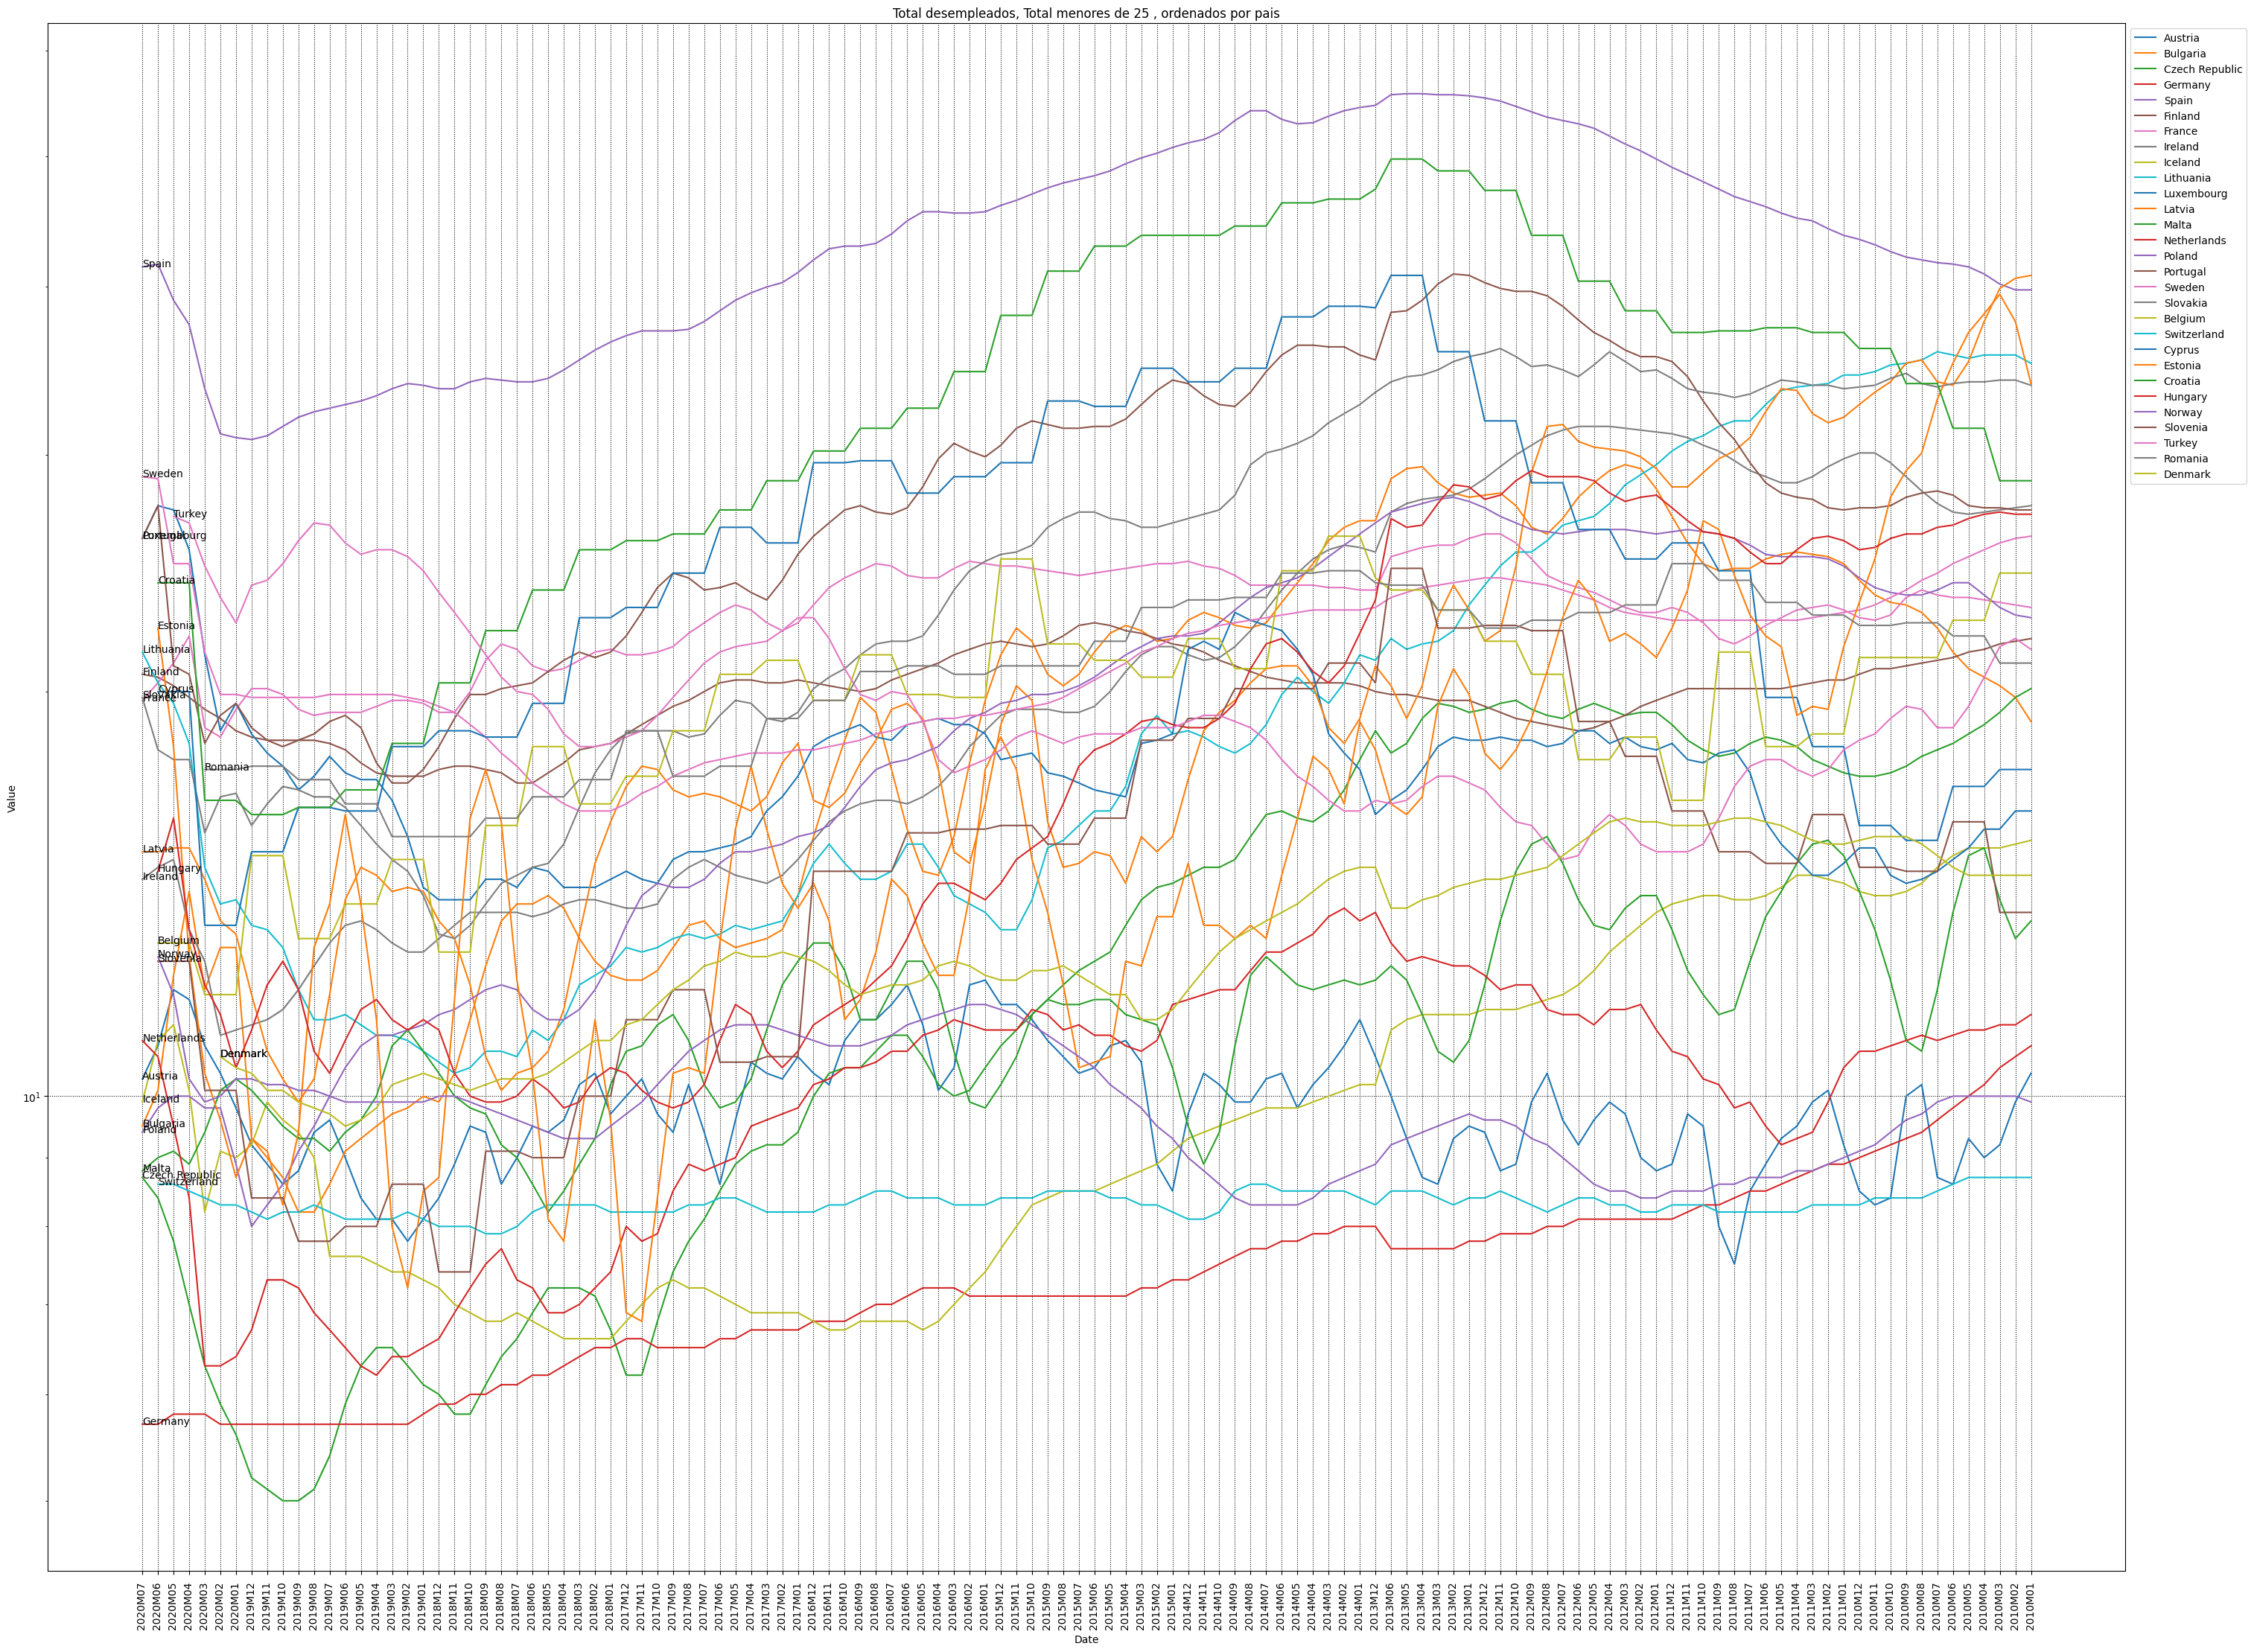

In [38]:
total_Y_LT25_df = data_tr_df.loc[(data_tr_df.age=='Y_LT25')&(data_tr_df.unit=='PC_ACT')&(data_tr_df.sex=='T')&(data_tr_df.s_adj=='TC')]
plot_time_variation(total_Y_LT25_df, size=9, is_log=True, title = "Total menores de 25 ")

In [39]:
#Graficas para comparar grupos de edad, sexo segun el pais.

In [40]:
def plot_time_variation_age_sex(data_tr_df, y='Value', country="Netherlands"):
    c_df = data_tr_df.loc[(data_tr_df.country==country)&(data_tr_df.unit=='PC_ACT')&(data_tr_df.s_adj=='TC')]
    f, ax = plt.subplots(1,1, figsize=(16,12))
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='F')],  label="Mujeres <25 años")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='M')],  label="Hombres <25 años")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y25-74')&(c_df.sex=='F')],  label="Mujeres, 25-74 años")  
    sns.lineplot(x="Date", y=y, data=c_df.loc[(c_df.age=='Y25-74')&(c_df.sex=='M')],  label="Hombres, 25-74 años")  

    plt.xticks(rotation=90)
    plt.title(f'Total unemployment in {country}, grouped by age & sex')
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

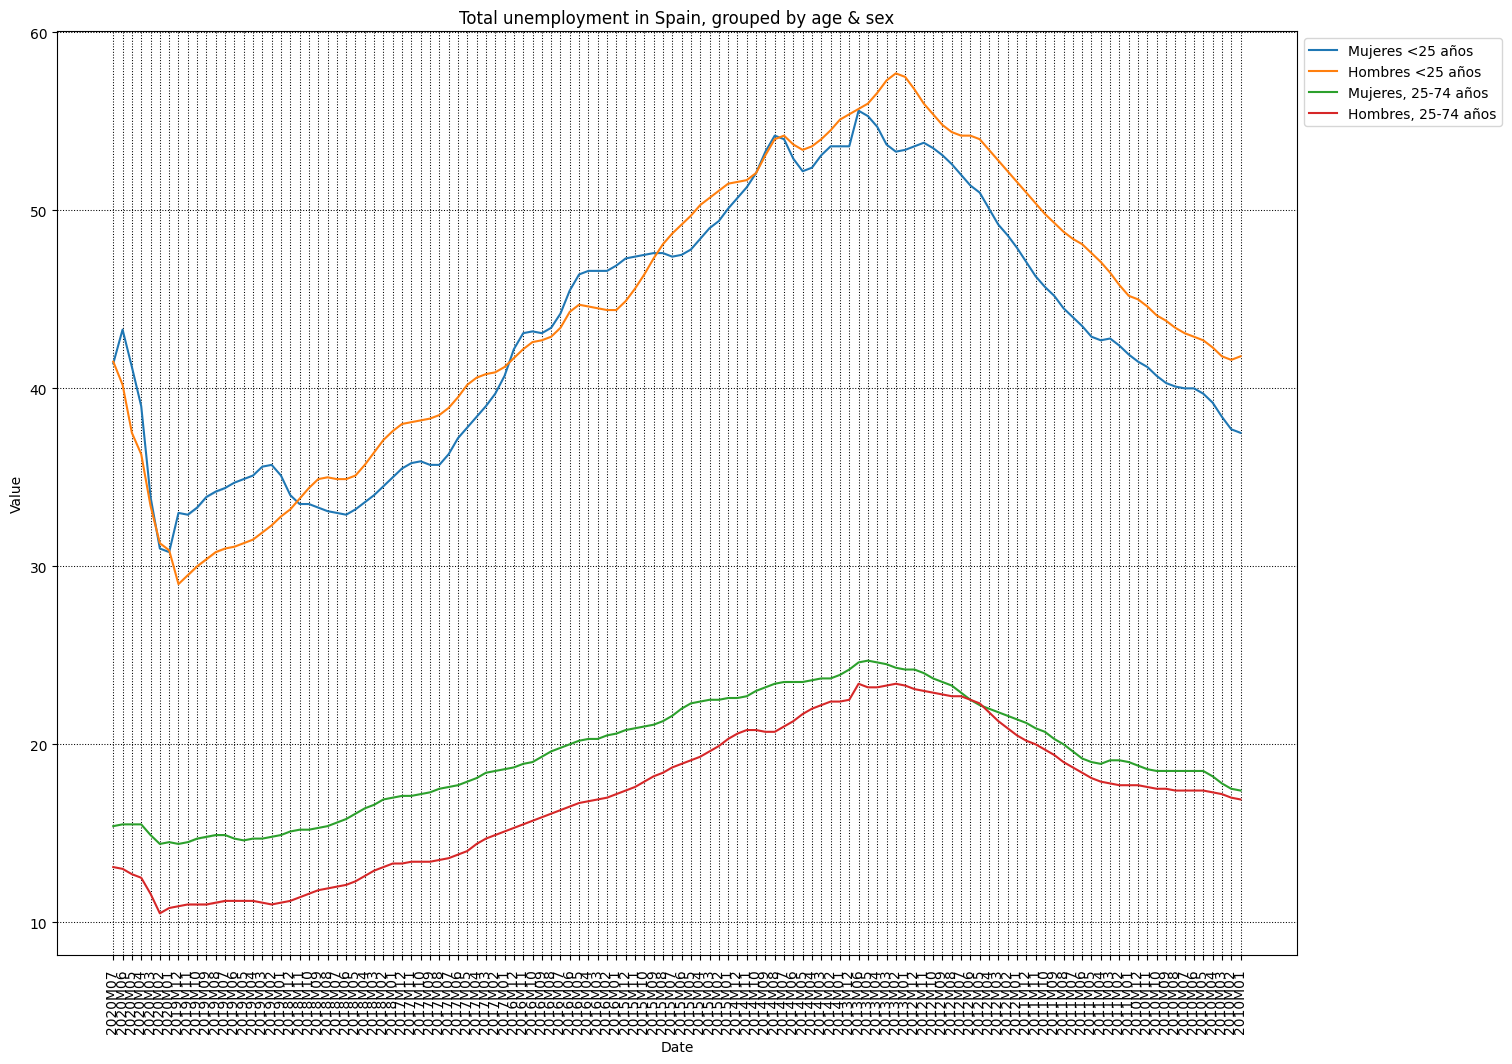

In [41]:
plot_time_variation_age_sex(data_tr_df,country="Spain")

In [42]:
#Definimos la función de mapas gráficos de europa
# Theese Plots will not show on Github, check https://plotly.com/python/maps/

In [43]:
import plotly.express as px

def plot_animated_map(dd_df, title):
    hover_text = []
    for index, row in dd_df.iterrows():
        hover_text.append((f"country: {row['country']}<br>unemployment: {row['Value']}%<br>country code: {row['iso']}"))
    dd_df['hover_text'] = hover_text

    fig = px.choropleth(dd_df, 
                        locations="C3",
                        hover_name='hover_text',
                        color="Value",
                        animation_frame="Date",
                        projection="natural earth",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        width=600, height=600)
    fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
    )
    fig.update_layout(title = title, geo_scope="europe")
    fig.show()    

In [44]:
c_df = data_tr_df.loc[(data_tr_df.unit=='PC_ACT')&(data_tr_df.s_adj=='TC')]
dd_df=c_df.loc[(c_df.age=='Y25-74')&(c_df.sex=='T')]
dd_df = dd_df.sort_values(by='Date')
title = 'Porcentaje de desempleados por pais <br> Total entre 25-74 años'
plot_animated_map(dd_df, title)

In [45]:
c_df = data_tr_df.loc[(data_tr_df.unit=='PC_ACT')&(data_tr_df.s_adj=='TC')]
dd_df=c_df.loc[(c_df.age=='Y_LT25')&(c_df.sex=='T')]
dd_df = dd_df.sort_values(by='Date')
title = 'Porcentaje de desempleados por pais <br>Total menores de 25 años'
plot_animated_map(dd_df, title)

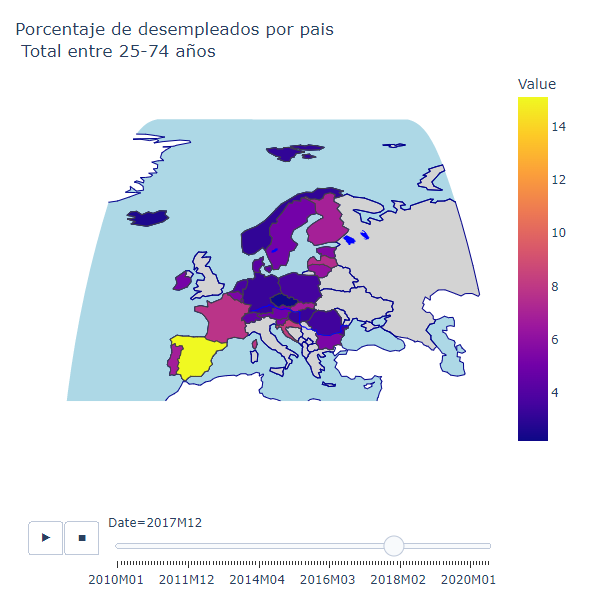